In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
original_data = pd.read_csv("Thyroid_Diff.csv")
original_data


Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenopathy       Pathology     Focality  \
0     Single nodular goiter-left         No  Micropapillary    Uni-Focal   
1            Multinodular goiter         No  Micropapillary    Uni-Focal   
2    Single nodular goiter-right         No  Micropapillary    Uni-Focal   
3    Single nodular goiter-right         No  Micropapillary    Uni-Focal   
4            Multinodular goiter         No  Micropapillary  Multi-Focal   
..                           ...        ...             ...          ...   
378  Single nodular goiter-right      Right       Papillary    Uni-Focal   
379          Multinodular goiter  Extensive       Papillary  Multi-Focal   
380          Multinodular goiter  Bilateral       Papillary  Multi-Focal   
381          Multinodular goiter  Extensive    Hurthel cell  Multi-Focal   
382          Multinodular goiter  Bilateral       Papillary  Multi-Focal   

     Risk    T    N   M Stage                Response Recurred  
0     Low  T1a   N0  M0     I           Indeterminate       No  
1     Low  T1a   N0  M0     I               Excellent       No  
2     Low  T1a   N0  M0     I               Excellent       No  
3     Low  T1a   N0  M0     I               Excellent       No  
4     Low  T1a   N0  M0     I               Excellent       No  
..    ...  ...  ...  ..   ...                     ...      ...  
378  High  T4b  N1b  M1   IVB  Biochemical Incomplete      Yes  
379  High  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
380  High  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
381  High  T4b  N1b  M0   IVA   Structural Incomplete      Yes  
382  High  T4b  N1b  M0   IVA   Structural Incomplete      Yes  

[383 rows x 17 columns]

In [3]:
repeat_factor = 3
df_expanded = pd.concat([original_data] * repeat_factor, ignore_index=True)

# Add small random noise to numeric columns (like Age) to simulate new data
if 'Age' in df_expanded.columns:
    df_expanded['Age'] = df_expanded['Age'] + np.random.randint(-2, 3, size=len(df_expanded))

# Save the expanded dataset
df_expanded.to_csv("Thyroid_Diff_expanded.csv", index=False)

df_expanded

Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0      27      F      No         No              No                 Euthyroid   
1      33      F      No        Yes              No                 Euthyroid   
2      28      F      No         No              No                 Euthyroid   
3      61      F      No         No              No                 Euthyroid   
4      61      F      No         No              No                 Euthyroid   
...   ...    ...     ...        ...             ...                       ...   
1144   72      M     Yes        Yes             Yes                 Euthyroid   
1145   79      M     Yes         No             Yes                 Euthyroid   
1146   71      M     Yes        Yes              No                 Euthyroid   
1147   59      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
1148   68      M     Yes         No              No                 Euthyroid   

             Physical Examination Adenopathy       Pathology     Focality  \
0      Single nodular goiter-left         No  Micropapillary    Uni-Focal   
1             Multinodular goiter         No  Micropapillary    Uni-Focal   
2     Single nodular goiter-right         No  Micropapillary    Uni-Focal   
3     Single nodular goiter-right         No  Micropapillary    Uni-Focal   
4             Multinodular goiter         No  Micropapillary  Multi-Focal   
...                           ...        ...             ...          ...   
1144  Single nodular goiter-right      Right       Papillary    Uni-Focal   
1145          Multinodular goiter  Extensive       Papillary  Multi-Focal   
1146          Multinodular goiter  Bilateral       Papillary  Multi-Focal   
1147          Multinodular goiter  Extensive    Hurthel cell  Multi-Focal   
1148          Multinodular goiter  Bilateral       Papillary  Multi-Focal   

      Risk    T    N   M Stage                Response Recurred  
0      Low  T1a   N0  M0     I           Indeterminate       No  
1      Low  T1a   N0  M0     I               Excellent       No  
2      Low  T1a   N0  M0     I               Excellent       No  
3      Low  T1a   N0  M0     I               Excellent       No  
4      Low  T1a   N0  M0     I               Excellent       No  
...    ...  ...  ...  ..   ...                     ...      ...  
1144  High  T4b  N1b  M1   IVB  Biochemical Incomplete      Yes  
1145  High  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
1146  High  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
1147  High  T4b  N1b  M0   IVA   Structural Incomplete      Yes  
1148  High  T4b  N1b  M0   IVA   Structural Incomplete      Yes  

[1149 rows x 17 columns]

In [4]:
df_expanded.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [5]:
df_expanded.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
for col in df_expanded.columns:
    if df_expanded[col].dtype == 'object':
        print(f"{col}: {df_expanded[col].nunique()} unique values")

Gender: 2 unique values
Smoking: 2 unique values
Hx Smoking: 2 unique values
Hx Radiothreapy: 2 unique values
Thyroid Function: 5 unique values
Physical Examination: 5 unique values
Adenopathy: 6 unique values
Pathology: 4 unique values
Focality: 2 unique values
Risk: 3 unique values
T: 7 unique values
N: 3 unique values
M: 2 unique values
Stage: 5 unique values
Response: 4 unique values
Recurred: 2 unique values


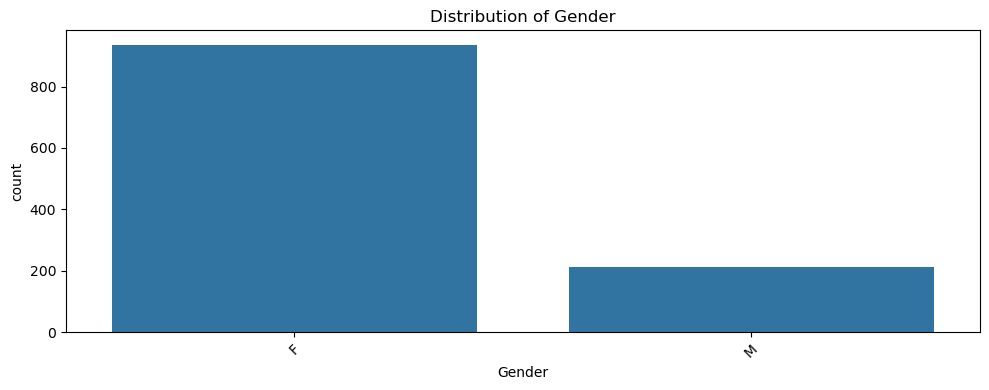

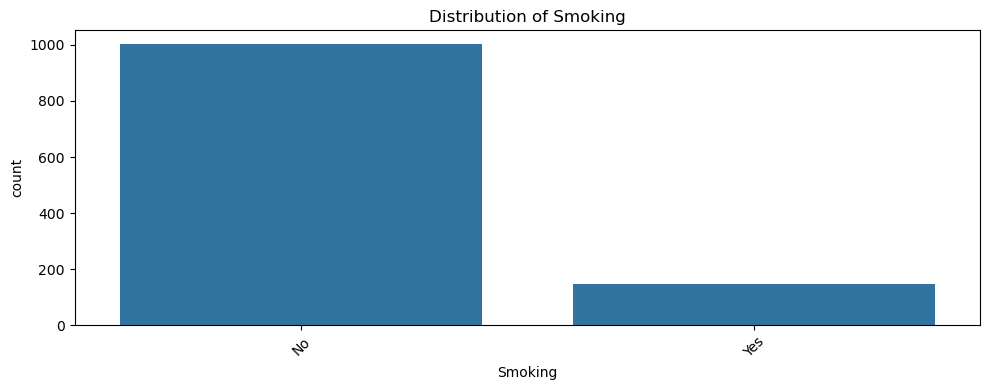

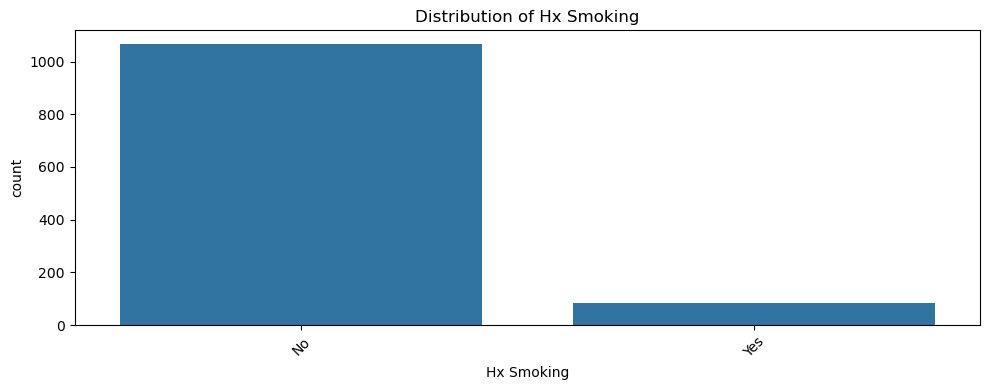

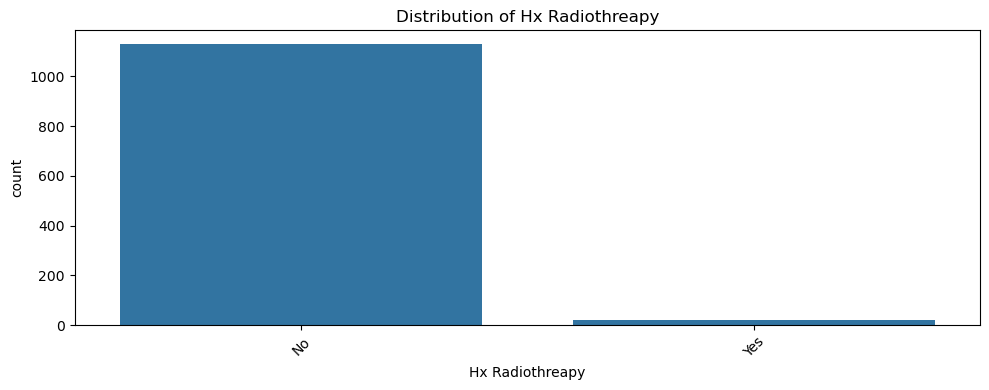

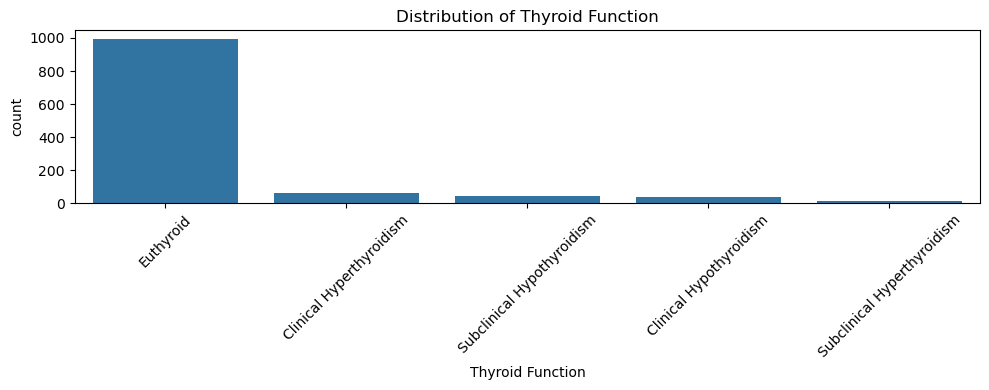

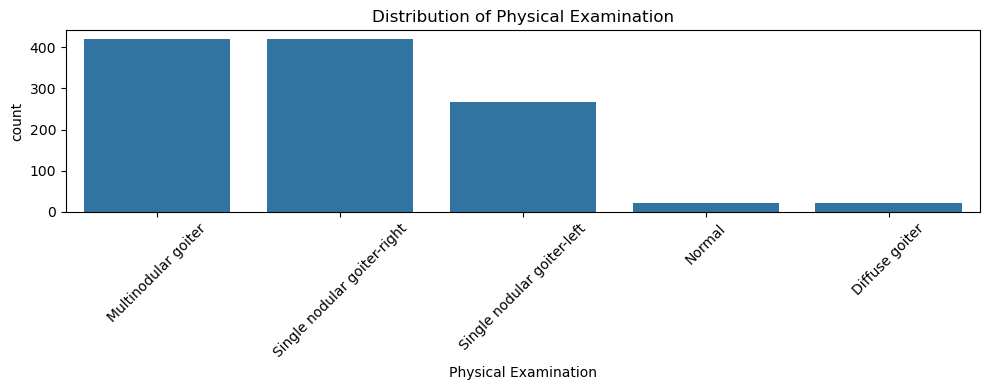

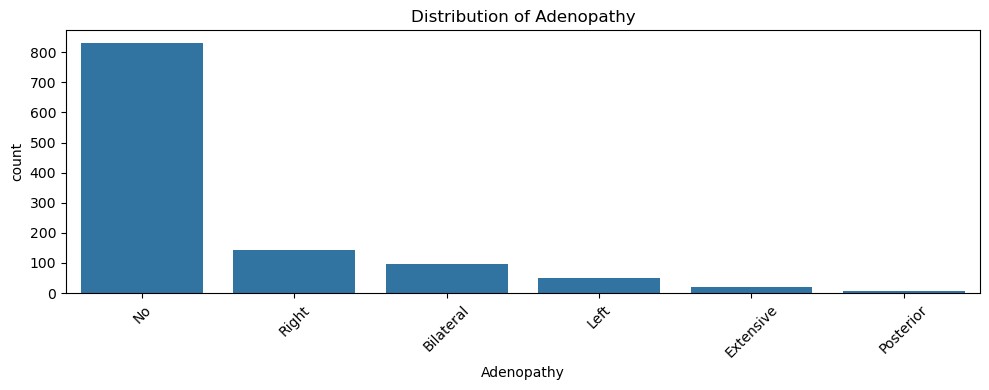

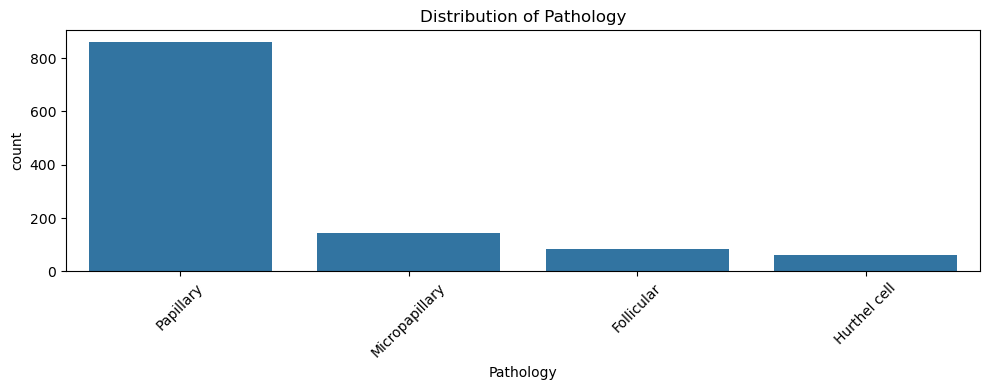

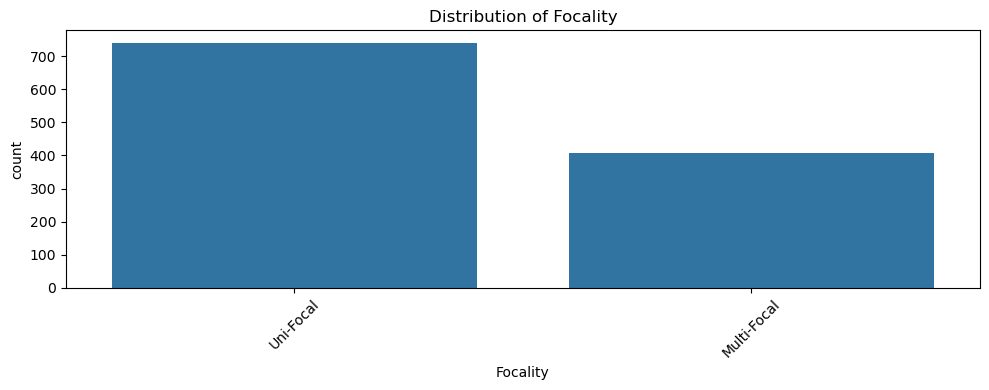

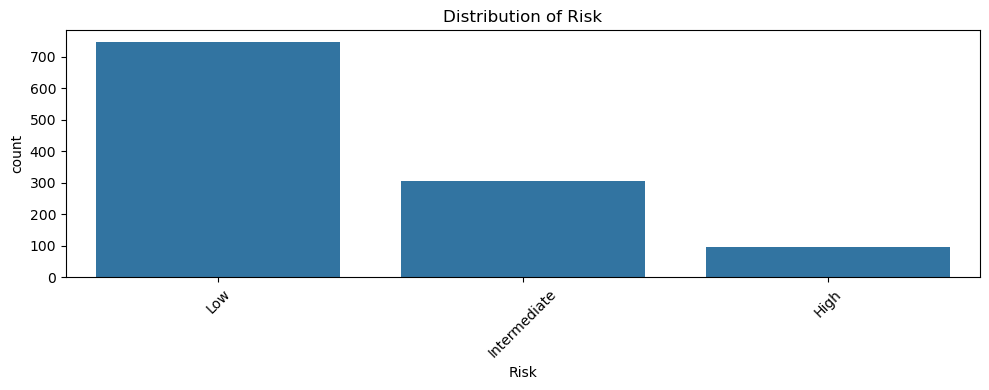

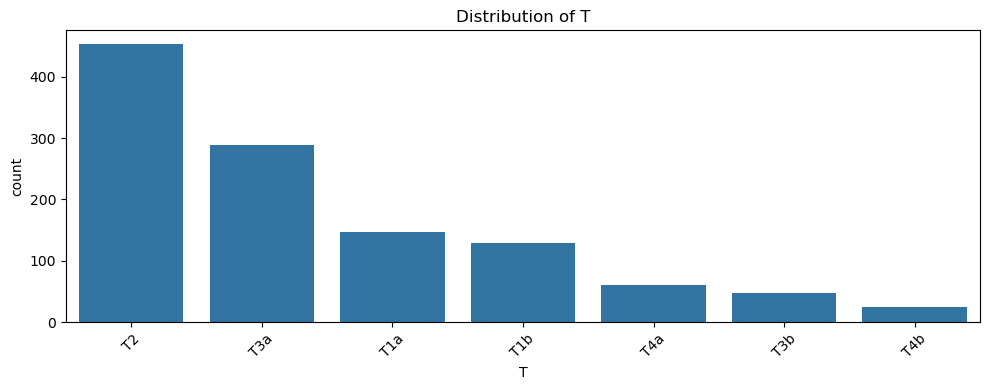

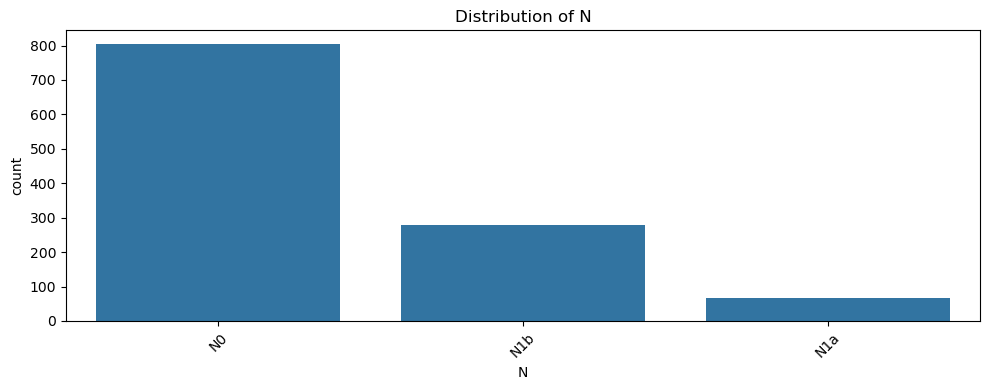

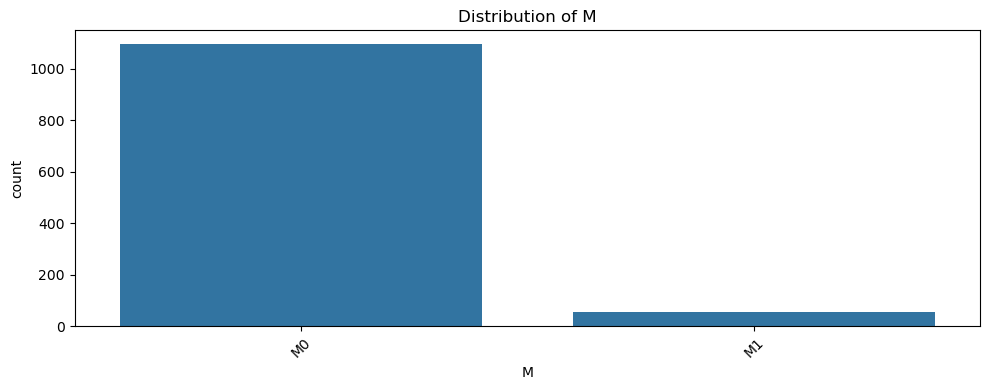

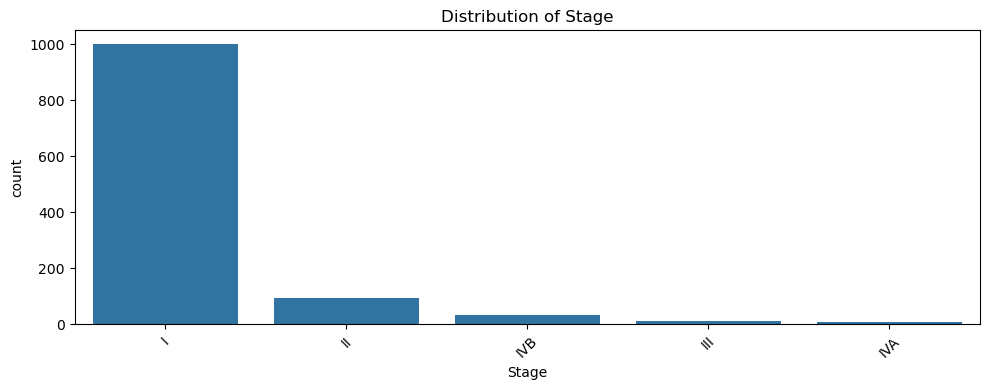

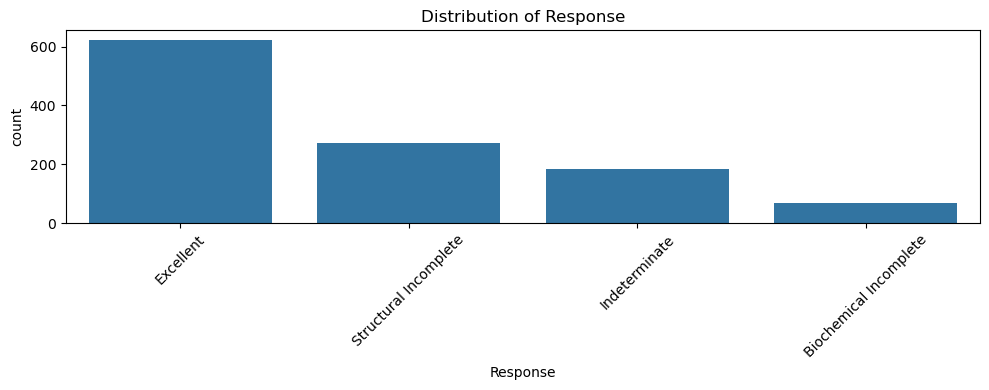

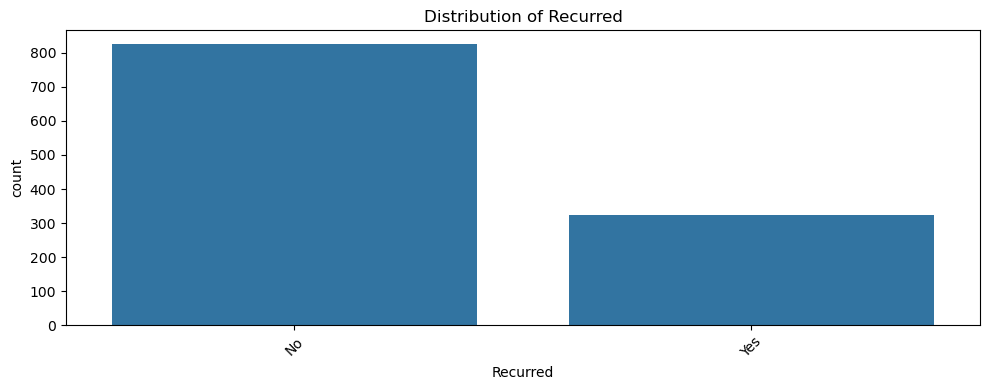

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_expanded.columns:
    if df_expanded[col].dtype == 'object':
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df_expanded, x=col, order=df_expanded[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [8]:
df_expanded['Recurred'].value_counts()


Recurred
No     825
Yes    324
Name: count, dtype: int64

In [9]:

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()



X = df_expanded.drop(columns=['Recurred'])  # All columns except 'Recurred'
y = df_expanded['Recurred'] 
X_resampled, y_resampled = rus.fit_resample(X, y)


def plot_class_distribution(y, title="Class Distribution"):
    sns.countplot(x=y, palette='Set2')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Example usage:


C:\Users\vijay\AppData\Local\Temp\ipykernel_36724\716495005.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


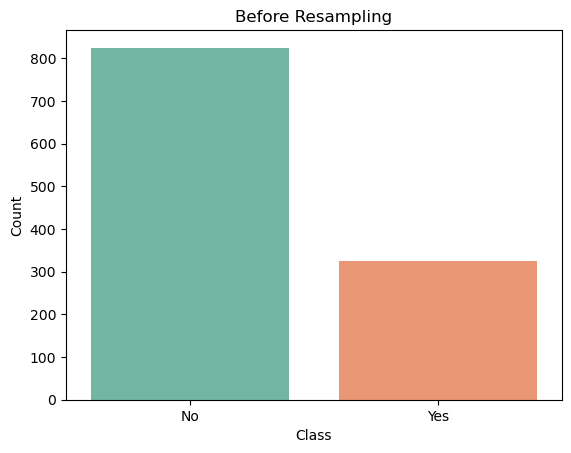

C:\Users\vijay\AppData\Local\Temp\ipykernel_36724\716495005.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


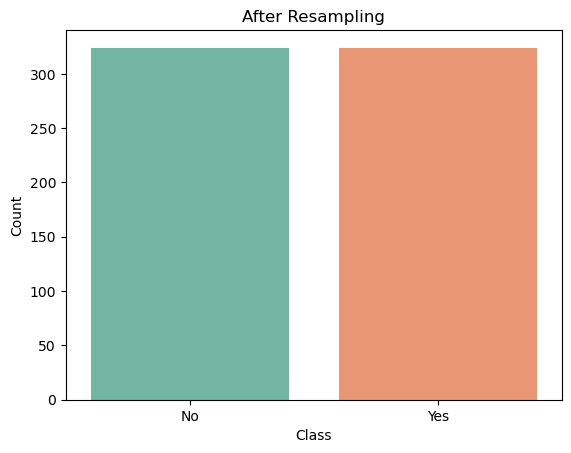

In [10]:
plot_class_distribution(y, title="Before Resampling")
plot_class_distribution(y_resampled, title="After Resampling")


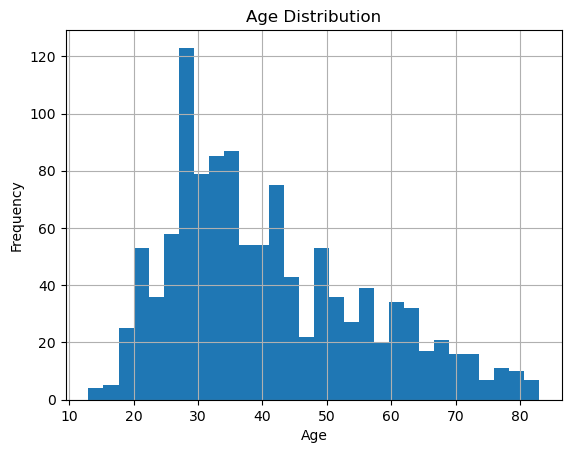

In [11]:
#AGE DISTRIBUTION 
df_expanded['Age'].describe()
df_expanded['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

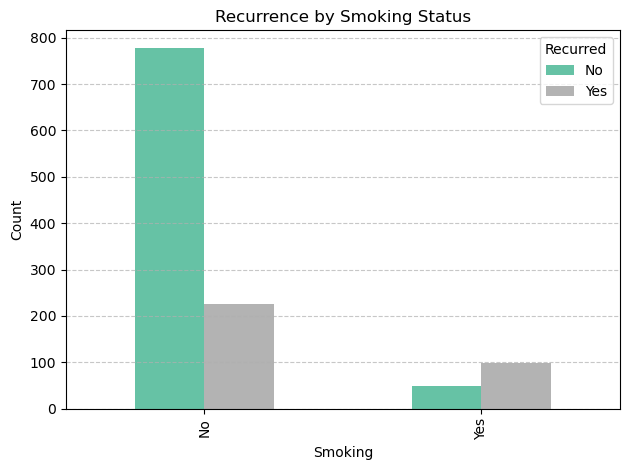

In [12]:

# Create a crosstab: Smoking vs Recurred
ct = pd.crosstab(df_expanded['Smoking'], df_expanded['Recurred'])

# Plot the crosstab as a grouped bar chart
ct.plot(kind='bar', stacked=False, colormap='Set2')

# Chart customization
plt.title('Recurrence by Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

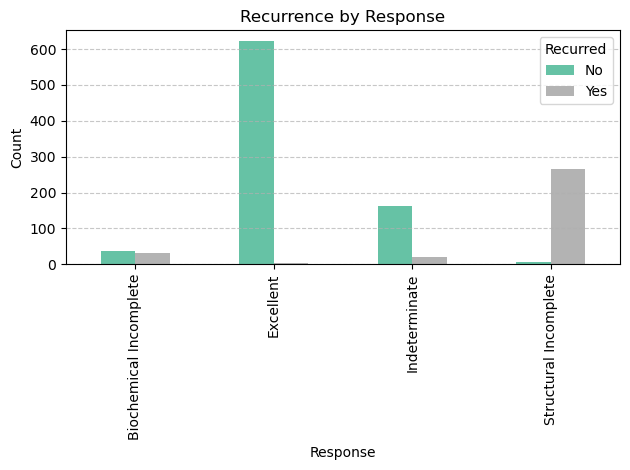

In [40]:
# Create a crosstab: Smoking vs Recurred
ct = pd.crosstab(df_expanded['Response'], df_expanded['Recurred'])

# Plot the crosstab as a grouped bar chart
ct.plot(kind='bar', stacked=False, colormap='Set2')

# Chart customization
plt.title('Recurrence by Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

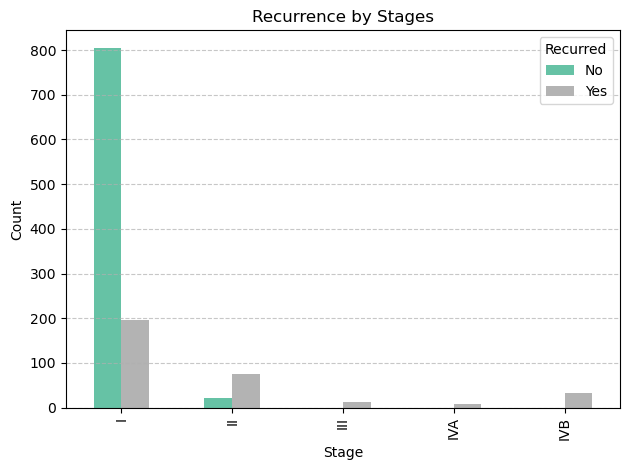

In [13]:
# Create a crosstab: Smoking vs Recurred
ct = pd.crosstab(df_expanded['Stage'], df_expanded['Recurred'])

# Plot the crosstab as a grouped bar chart
ct.plot(kind='bar', stacked=False, colormap='Set2')

# Chart customization
plt.title('Recurrence by Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# MODELS EVALUATION 

## 1 MODEL :-  RANDOM FOREST MULTIVARIATE

In [14]:

features = ['Response', 'Risk', 'N']  # You can add more features
target = 'Recurred'

X = df_expanded[features]
y = df_expanded[target]

# 3. Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X.loc[:, col] = le.fit_transform(X[col])


y = le.fit_transform(y)

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# 7. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 7. Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.97
Confusion Matrix:
[[166   0]
 [  7  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       166
           1       1.00      0.89      0.94        64

    accuracy                           0.97       230
   macro avg       0.98      0.95      0.96       230
weighted avg       0.97      0.97      0.97       230



# CONFUSION MATRIX FOR MULTIVARIATE RANDOM FOREST MODEL

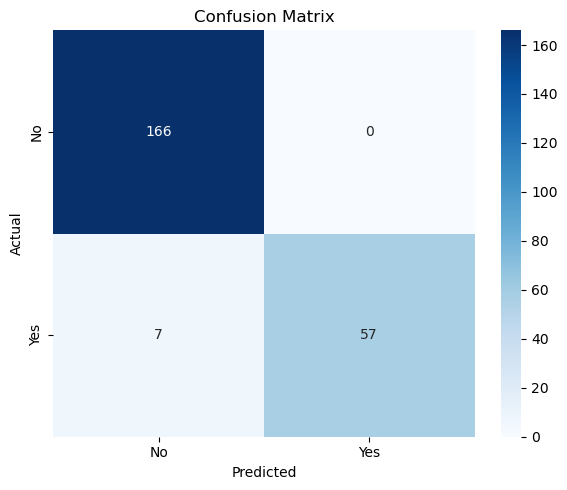

In [15]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Define class names (if known)
class_names = ['No', 'Yes']  # adjust based on your labels

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## FEATURE IMPORTANCE

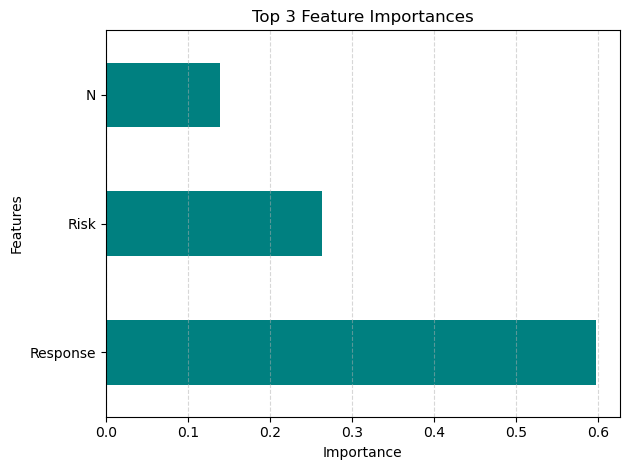

In [16]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color='teal')
plt.title('Top 3 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# UNIVARIATE

In [17]:
features = ['Response']  # You can add more features
target = 'Recurred'

X = df_expanded[features].copy()
y = df_expanded[target]

# 3. Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# 7. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 7. Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.92
Confusion Matrix:
[[153  13]
 [  6  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       166
           1       0.82      0.91      0.86        64

    accuracy                           0.92       230
   macro avg       0.89      0.91      0.90       230
weighted avg       0.92      0.92      0.92       230



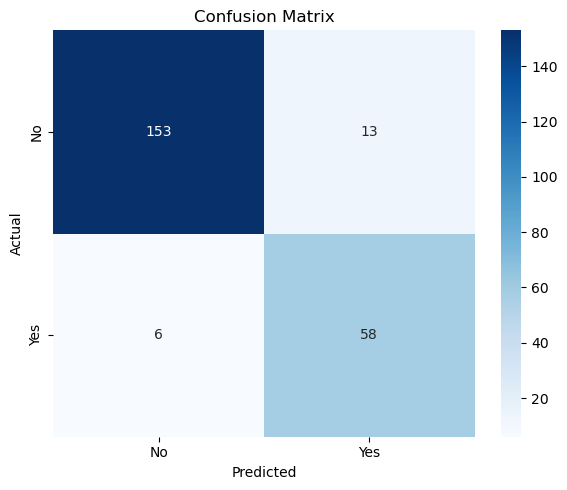

In [18]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Define class names (if known)
class_names = ['No', 'Yes']  # adjust based on your labels

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# 2 MODEL XGB 

## MULTIVARIATE

In [18]:
features = ['Response', 'Risk', 'N']  # You can add more features
target = 'Recurred'

X = df_expanded[features].copy()
y = df_expanded[target]

# 3. Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])
        
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       166
           1       1.00      0.89      0.94        64

    accuracy                           0.97       230
   macro avg       0.98      0.95      0.96       230
weighted avg       0.97      0.97      0.97       230


Confusion Matrix:
[[166   0]
 [  7  57]]


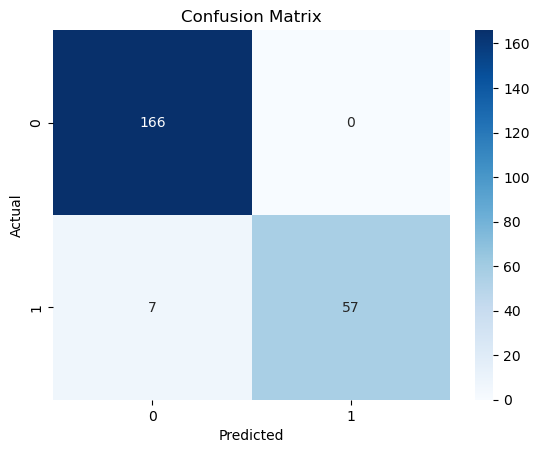

In [19]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# UNIVARIATE XGB MODEL

In [20]:
features = ['Response']  # You can add more features
target = 'Recurred'

X = df_expanded[features].copy()
y = df_expanded[target]

# 3. Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       166
           1       0.82      0.91      0.86        64

    accuracy                           0.92       230
   macro avg       0.89      0.91      0.90       230
weighted avg       0.92      0.92      0.92       230


Confusion Matrix:
[[153  13]
 [  6  58]]


<Figure size 600x600 with 0 Axes>

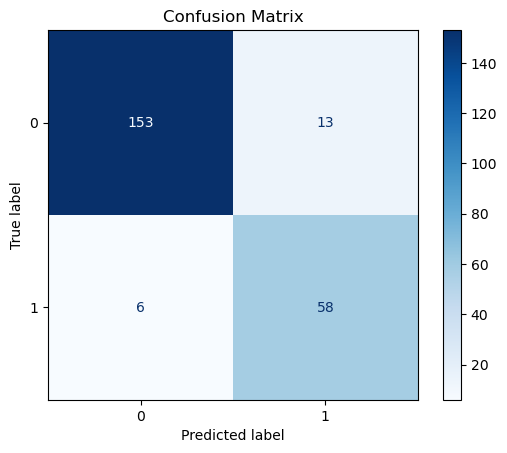

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
